In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing, metrics


import statsmodels.api as sm

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, root_mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression


df = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/refs/heads/main/Loan%20Eligibility%20Prediction.csv')
df

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,569,Female,No,0,Graduate,No,2378,0.0,9,360,1,Urban,N
1,15,Male,Yes,2,Graduate,No,1299,1086.0,17,120,1,Urban,Y
2,95,Male,No,0,Not Graduate,No,3620,0.0,25,120,1,Semiurban,Y
3,134,Male,Yes,0,Graduate,Yes,3459,0.0,25,120,1,Semiurban,Y
4,556,Male,Yes,1,Graduate,No,5468,1032.0,26,360,1,Semiurban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,480,Male,Yes,2,Graduate,No,2947,1603.0,10,360,1,Urban,N
610,525,Male,No,0,Graduate,No,4680,2087.0,15,360,1,Semiurban,N
611,551,Male,Yes,2,Graduate,Yes,6633,0.0,25,360,0,Rural,N
612,552,Male,Yes,1,Not Graduate,No,2492,2375.0,30,360,1,Rural,Y


In [2]:
# обращаем столбцы тииа object в бинарные
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

data = df.copy()
for col in data.columns:
  if data[col].dtype == 'object':
    data[col] = encoder.fit_transform(data[col])
data.head()
data

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,569,0,0,0,0,0,2378,0.0,9,360,1,2,0
1,15,1,1,2,0,0,1299,1086.0,17,120,1,2,1
2,95,1,0,0,1,0,3620,0.0,25,120,1,1,1
3,134,1,1,0,0,1,3459,0.0,25,120,1,1,1
4,556,1,1,1,0,0,5468,1032.0,26,360,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,480,1,1,2,0,0,2947,1603.0,10,360,1,2,0
610,525,1,0,0,0,0,4680,2087.0,15,360,1,1,0
611,551,1,1,2,0,1,6633,0.0,25,360,0,0,0
612,552,1,1,1,1,0,2492,2375.0,30,360,1,0,1


In [3]:
#проверка на пустые значения
data.isna().sum()

,0
Customer_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
Applicant_Income,0
Coapplicant_Income,0
Loan_Amount,0
Loan_Amount_Term,0


In [4]:
#прорверка типов значений
data.dtypes

,0
Customer_ID,int64
Gender,int64
Married,int64
Dependents,int64
Education,int64
Self_Employed,int64
Applicant_Income,int64
Coapplicant_Income,float64
Loan_Amount,int64
Loan_Amount_Term,int64


In [5]:
#выбираем Loan_Amount как таргет
data['Loan_Amount'].describe()

,Loan_Amount
count,614.000000
mean,142.022801
std,87.083089
min,9.000000
25%,98.000000
50%,125.000000
75%,164.750000
max,700.000000


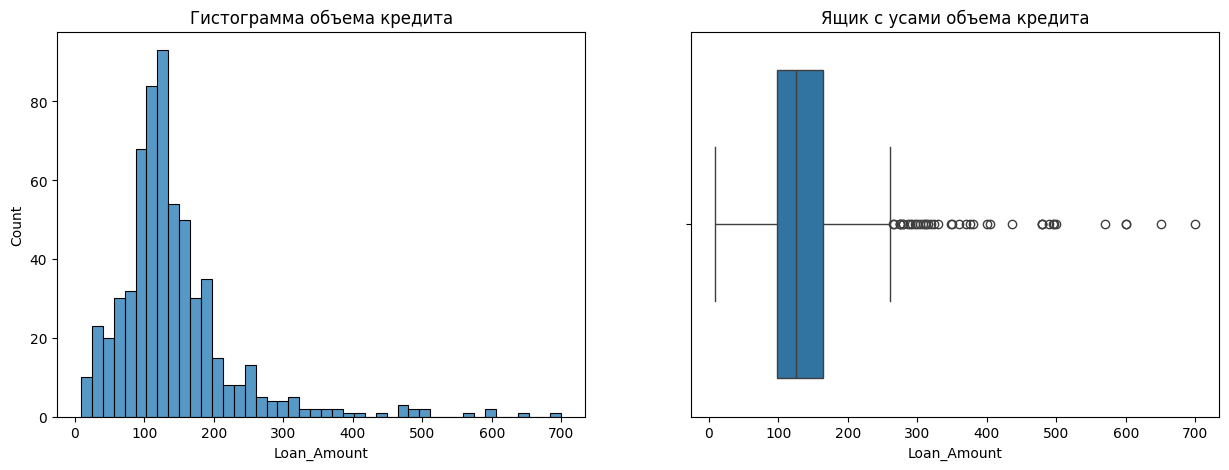

In [6]:
#распределение Loan_Amount
def distribution(df):
  fig,ax = plt.subplots(1,2,figsize=(15,5))
  sns.histplot(data = df, x='Loan_Amount', ax=ax[0])
  sns.boxplot(data = df, x='Loan_Amount', ax=ax[1])
  ax[0].set_title('Гистограмма объема кредита')
  ax[1].set_title('Ящик с усами объема кредита')
distribution(data)

In [7]:
data['Loan_Amount'].value_counts().head()

,count
Loan_Amount,
120,20
110,17
100,15
187,12
160,12


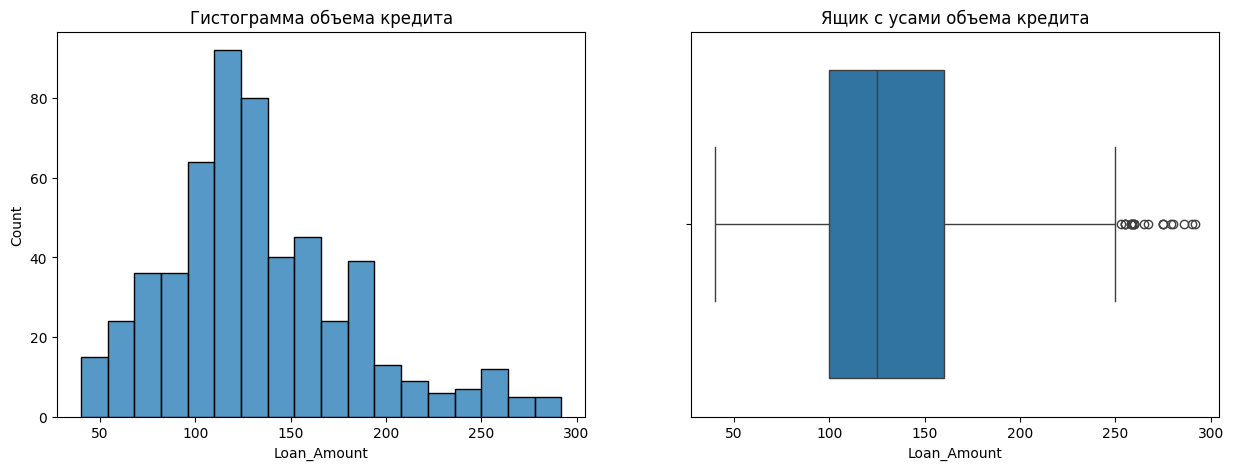

In [8]:
#убираем выбросы
clean_data = data[(data['Loan_Amount']>=data['Loan_Amount'].quantile(0.05))&(data['Loan_Amount']<=data['Loan_Amount'].quantile(0.95))]
distribution(clean_data)

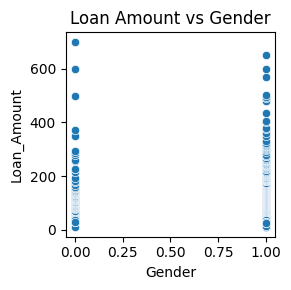

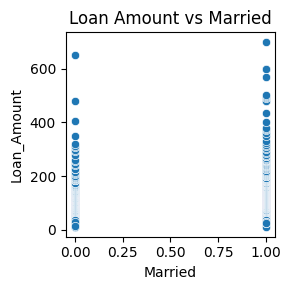

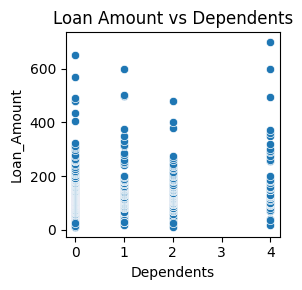

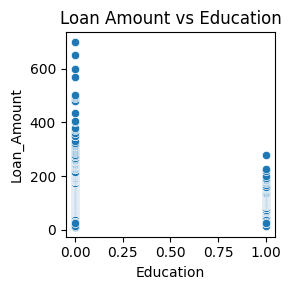

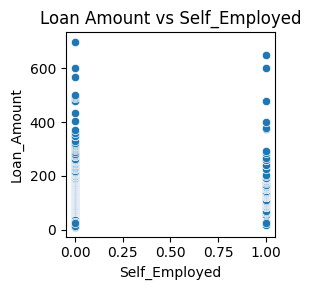

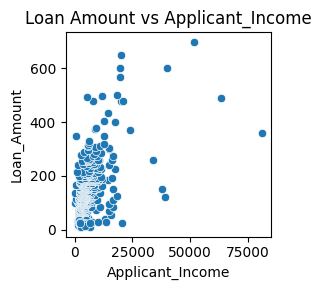

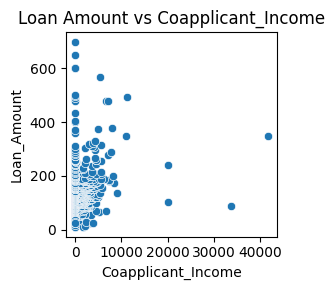

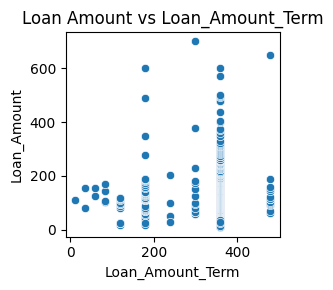

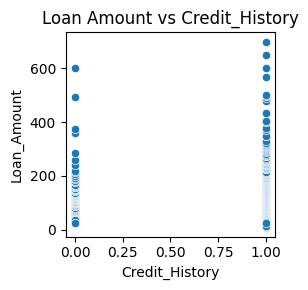

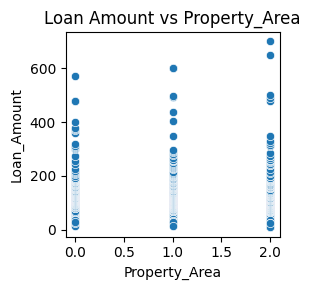

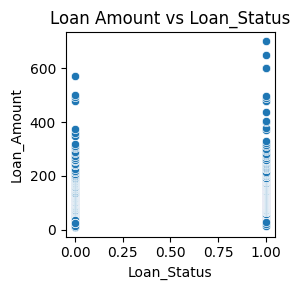

In [9]:
x = data.drop(['Loan_Amount', 'Customer_ID'], axis=1)
y = data['Loan_Amount']

for col in x.columns:
    plt.figure(figsize=(3, 3))
    sns.scatterplot(x=x[col], y=y)
    plt.title('Loan Amount vs ' + col)
    plt.xlabel(col)
    plt.ylabel('Loan_Amount')
    plt.tight_layout()

Вывод: взаимосвязи бинарных или категориальных переменных с таргетом не определяются линейно, линейные взаимосвязи прослеживаются у вещественных переменных типа Applicant_Income клиента или Coapplicant_Income

In [10]:
# функция лин регресси
def lin_reg_model(df,features,target):
  x_train, x_test, y_train, y_test = train_test_split(df[features],df[target],test_size=0.25, random_state = 24)
  lin_reg = LinearRegression()
  lin_reg.fit(x_train,y_train)
  y_pred = lin_reg.predict(x_test)

  fig, ax= plt.subplots(1,1,figsize=(5,5))
  sns.scatterplot(x = y_test.values.ravel(), y = y_pred.ravel(), ax =ax)
  sns.lineplot(x = y_test.values.ravel(), y = y_test.values.ravel(), c='blue', ax=ax)
  ax.set_title('Истинные и предсказанные значения y')
  ax.set_xlabel('y_test')
  ax.set_ylabel('y_pred')

  print('Среднее значение Y: ', np.mean(y_test.values))
  print('Среднеквадратическое отклонение Y: ', np.std(y_test.values))
  print('MSE: ', mean_squared_error(y_test, y_pred)),
  print('RMSE: ', root_mean_squared_error(y_test, y_pred))
  print('MAE: ', mean_absolute_error(y_test, y_pred))
  print('MAPE: ', mean_absolute_percentage_error(y_test, y_pred))
  print('R2: ', r2_score(y_test, y_pred))

  print('Коэффициенты w: ', lin_reg.coef_)
  print('Смещение bias: ', lin_reg.intercept_)




Среднее значение Y:  153.04545454545453
Среднеквадратическое отклонение Y:  109.35836127447021
MSE:  7305.56826473833
RMSE:  85.47261704627003
MAE:  52.24274082512393
MAPE:  0.590440704921313
R2:  0.3891282861784603
Коэффициенты w:  [[-9.01308394e-01  1.01355111e+01  6.51820911e+00 -1.98462322e+01
   1.46086215e+01  5.97109046e-03  8.05745690e-03  9.64477965e-02
  -1.35911949e+00 -5.24403092e+00  3.64118481e-01]]
Смещение bias:  [58.9334264]


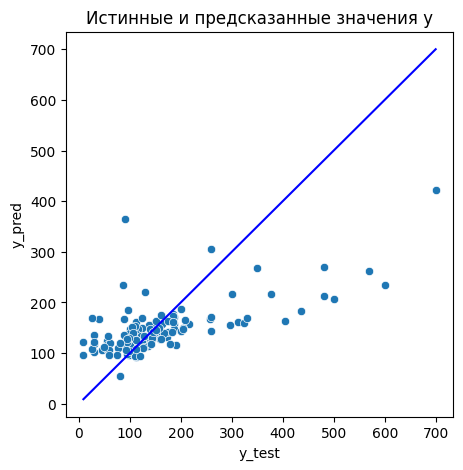

In [11]:
#обучим модель до выбросов
features = data.drop(['Loan_Amount', 'Customer_ID'], axis=1).columns
target = ['Loan_Amount']
lin_reg_model(data, features, target)


Среднее значение Y:  135.6086956521739
Среднеквадратическое отклонение Y:  51.102261043968724
MSE:  2130.2009310611184
RMSE:  46.15409982938805
MAE:  34.92905417359848
MAPE:  0.3264904682035521
R2:  0.1842814512374309
Коэффициенты w:  [-4.50941381e-01  1.63878354e+01  4.87764233e+00 -9.65687483e+00
  1.44595010e+01  4.44462685e-03  3.40107442e-03  4.72978717e-02
  3.43551076e+00 -3.27069805e+00 -6.53498127e+00]
Смещение bias:  81.5413511427794


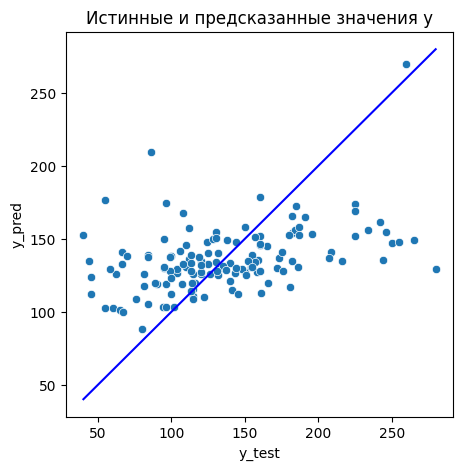

In [12]:
#обучим модель после выбросов
features = clean_data.drop(['Loan_Amount', 'Customer_ID'], axis=1).columns
target = 'Loan_Amount'
lin_reg_model(clean_data, features, target)


значительно улучшается MAE с учетом выбросов, при этом r2 указывает на низкую объясняемость линейной модели

Среднее значение Y:  135.6086956521739
Среднеквадратическое отклонение Y:  51.102261043968724
MSE:  2056.56477756405
RMSE:  45.34936358499478
MAE:  34.36162535161769
MAPE:  0.32635822353344357
R2:  0.21247896790885845
Коэффициенты w:  [0.00507246 0.00389658]
Смещение bias:  102.81138143981073


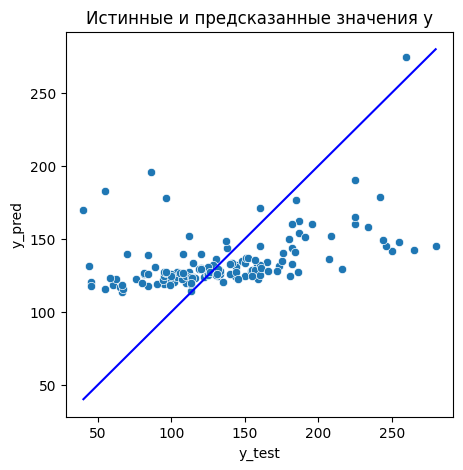

In [13]:
#обучим модель для 2 столбцов
features = ['Applicant_Income', 'Coapplicant_Income']
target = 'Loan_Amount'
lin_reg_model(clean_data, features, target)

после того, как оставили только вещественные переменные в модели , mae остлся прежним, а R2 незначительно вырос

Среднее значение Y:  135.6086956521739
Среднеквадратическое отклонение Y:  51.102261043968724
MSE:  2220.4628132205917
RMSE:  47.12178703339456
MAE:  35.943861820891605
MAPE:  0.34170374281467336
R2:  0.14971743877733534
Коэффициенты w:  [0.00465737]
Смещение bias:  110.6006848170479


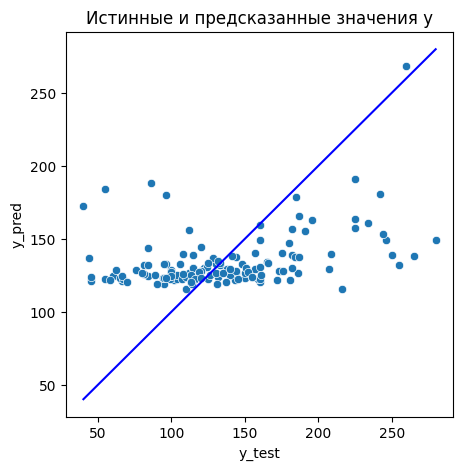

In [61]:
#обучим модель для 1 столбца
features = ['Applicant_Income']
target = 'Loan_Amount'
lin_reg_model(clean_data, features, target)

<Axes: >

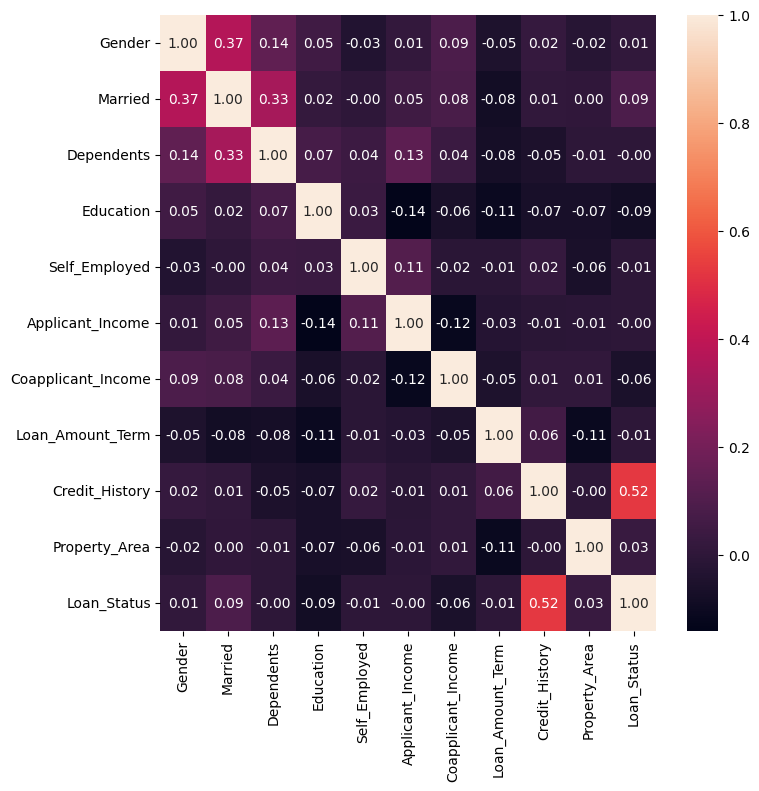

In [57]:
features = clean_data.drop(['Loan_Amount', 'Customer_ID'], axis=1).columns
fig, ax = plt.subplots(1,1, figsize = (8,8))
sns.heatmap(data[features].corr(), annot = True, fmt='.2f')

на одобрение кредита влияет кредитная история, хитмэп подтверждает, что влияние дохода слабо влияет на одобрение кредита.  коэффициент линейной регрессии  w около 0 для третьей модели на основе 1 столбца applicant_income также показал слабую зависимость таргета от applicant_income  

In [63]:
scaler_x = StandardScaler()

x_train_scaled = scaler_x.fit_transform(x_train)

x_test_scaled = scaler_x.transform(x_test)

lin_reg = LinearRegression()


lin_reg.fit(x_train_scaled, y_train)

r2 = lin_reg.score(x_test_scaled, y_test)

print('Коэффициенты w: ', lin_reg.coef_)
print('Смещение bias: ', lin_reg.intercept_)
print(f'Коэффициент детерминации R2: {r2}')

Коэффициенты w:  [-0.02761785  0.04783917  0.00691388 -0.04309309 -0.02220047  0.00103411
 -0.01053862 -0.02720593 -0.01779641  0.25402174 -0.01016824]
Смещение bias:  0.6869565217391305
Коэффициент детерминации R2: 0.1807780182559059


после стандартизации данных выявлено незначительные влияния переменных на таргет

Среднее значение Y:  132.8913043478261
Среднеквадратическое отклонение Y:  49.44832389454506
MSE:  1950.642202178441
RMSE:  44.16607524082756
MAE:  33.18784954589382
MAPE:  0.3034410718669422
R2:  0.20223594309675152


<Axes: ylabel='Loan_Amount'>

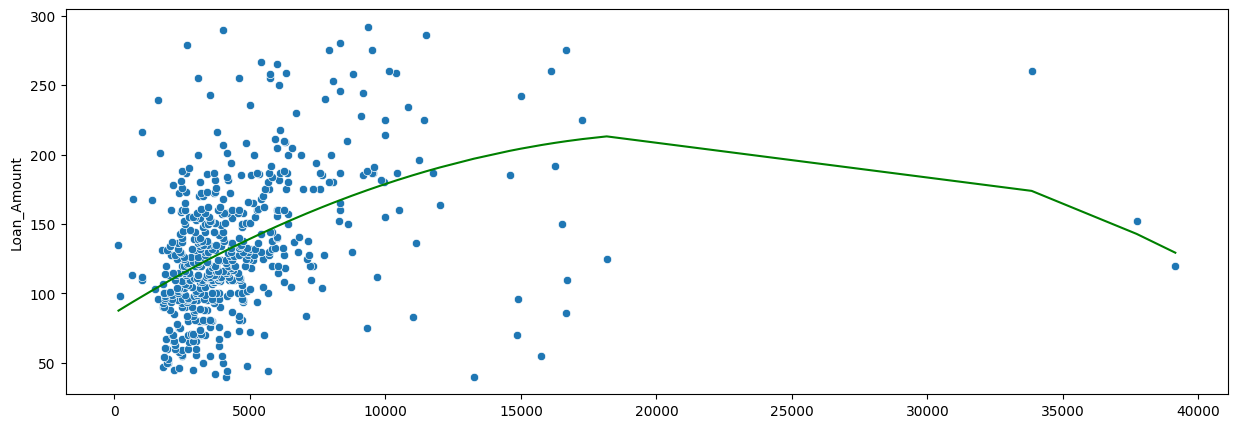

In [52]:
#попытка применить линейную регрессию полинома второй степени
x2 = clean_data['Applicant_Income'].values.reshape(-1,1)
y = clean_data['Loan_Amount']

X = np.hstack([x2, x2**2])
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X,y)
y_pred2 = lin_reg_2.predict(X)

print('Среднее значение Y: ', np.mean(y))
print('Среднеквадратическое отклонение Y: ', np.std(y))
print('MSE: ', mean_squared_error(y, y_pred2)),
print('RMSE: ', root_mean_squared_error(y, y_pred2))
print('MAE: ', mean_absolute_error(y, y_pred2))
print('MAPE: ', mean_absolute_percentage_error(y, y_pred2))
print('R2: ', r2_score(y, y_pred2))

plt.figure(figsize = (15,5))
sns.scatterplot(x = x2.ravel(), y = y)
sns.lineplot(x = x2.ravel(), y = y_pred2, c = 'green')